In [1]:
# articles_eda.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as path
plt.style.use("ggplot")      # 可改為預設

# ---------- 1. 讀取 ----------
ARTICLES_CSV = path.join("..","data","articles.csv")
df = pd.read_csv(ARTICLES_CSV)
# ---------- 2. 基本結構 ----------

print("\n【Data shape】", df.shape)
print("\n【dtypes】")
print(df.dtypes)

# ---------- 3. 缺失值統計 ----------
na_pct = df.isna().mean().sort_values(ascending=False)
print("\n【NA ratio (%)】")
print((na_pct*100).round(2))



【Data shape】 (105542, 25)

【dtypes】
article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                

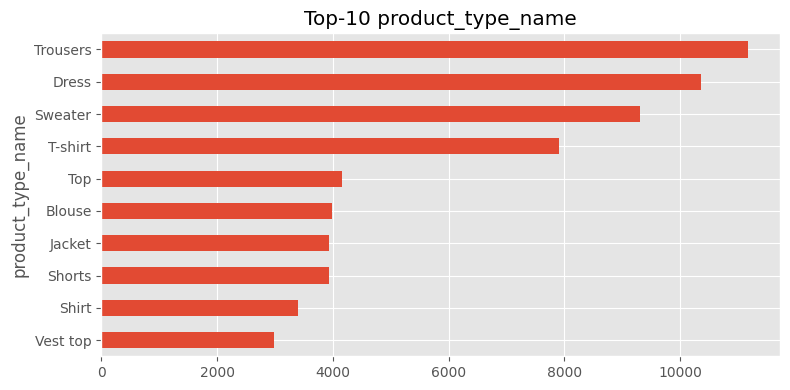

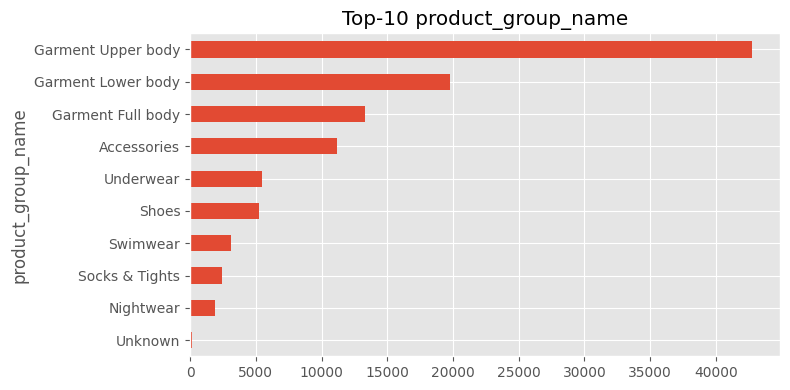

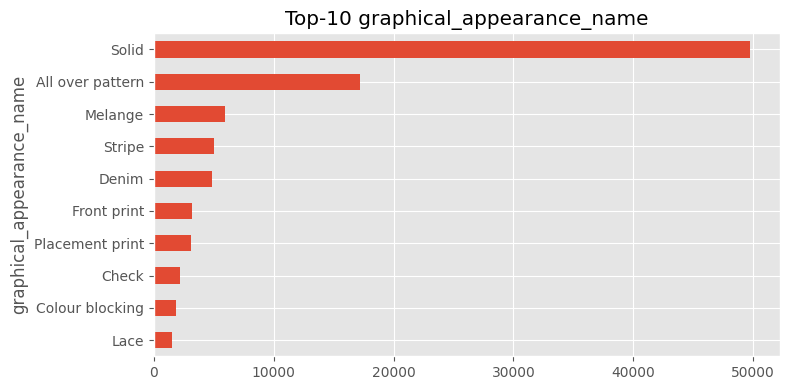

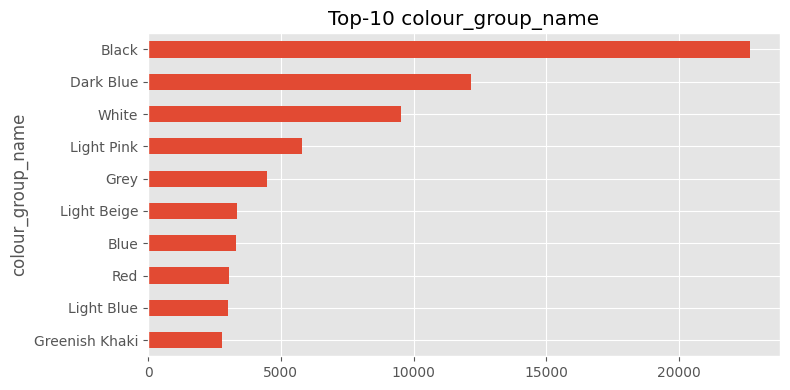

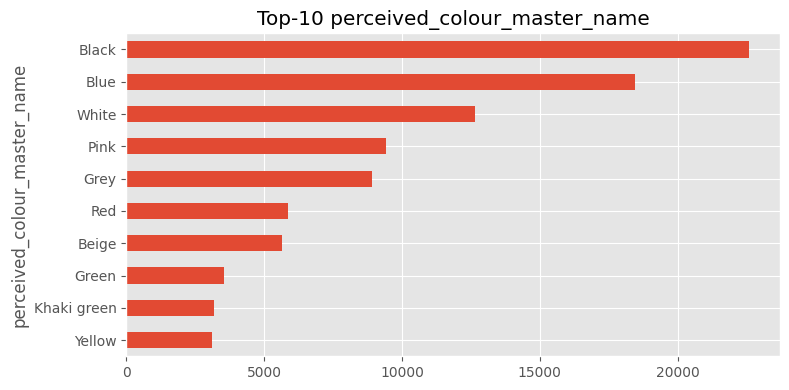

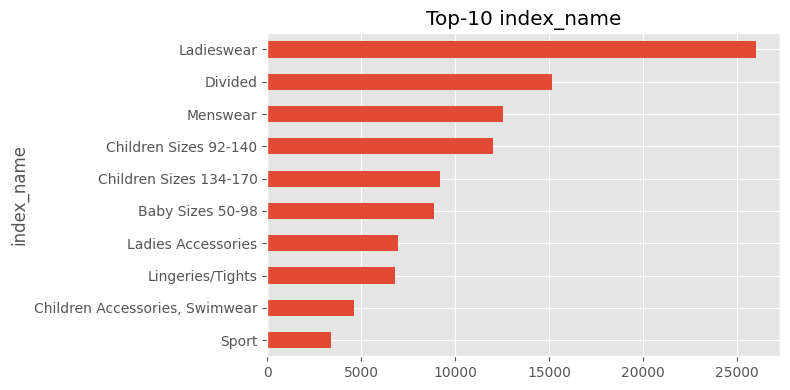

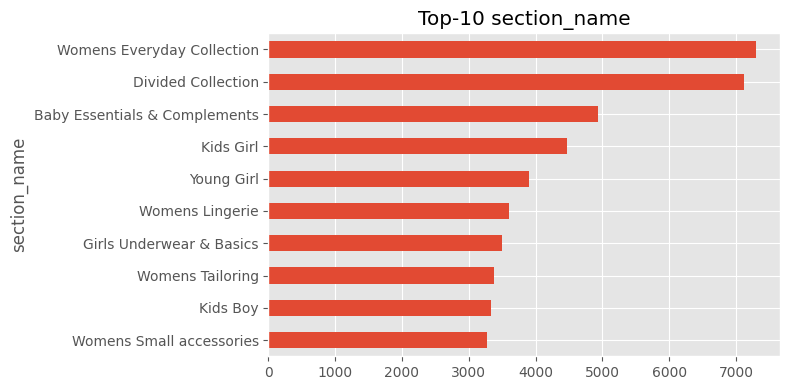

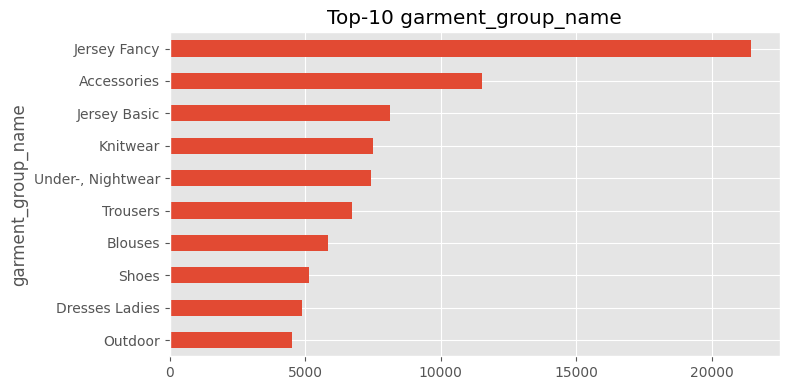

In [2]:
# ---------- 4. 類別欄位分布 ----------
cat_cols = [
    "product_type_name",   # 商品基本命名
    "product_group_name",  # 商品所屬群組
    "graphical_appearance_name", #外觀樣式名稱
    "colour_group_name", #商品顏色代碼
    "perceived_colour_master_name", #商品明暗分類名稱
    "index_name", #銷售分類代碼
    "section_name", #商品次分類名稱
    "garment_group_name", #商品細分類名稱
]

for col in cat_cols:
    top10 = df[col].value_counts().head(10)
    ax = top10.plot(kind="barh", figsize=(8,4), title=f"Top-10 {col}")
    ax.invert_yaxis()
    plt.tight_layout()
    #plt.savefig(f"fig_{col}.png")
    plt.show()
    #plt.close()

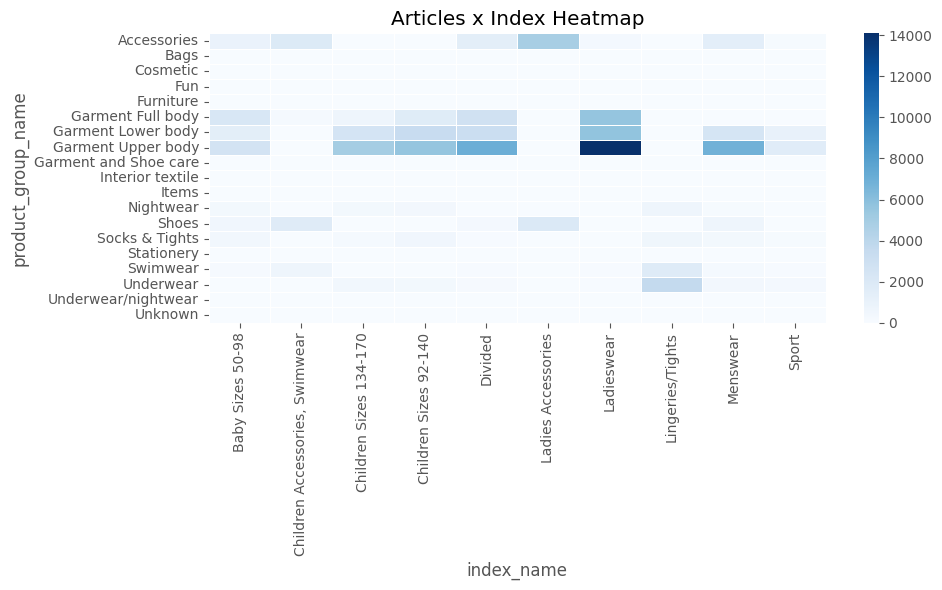

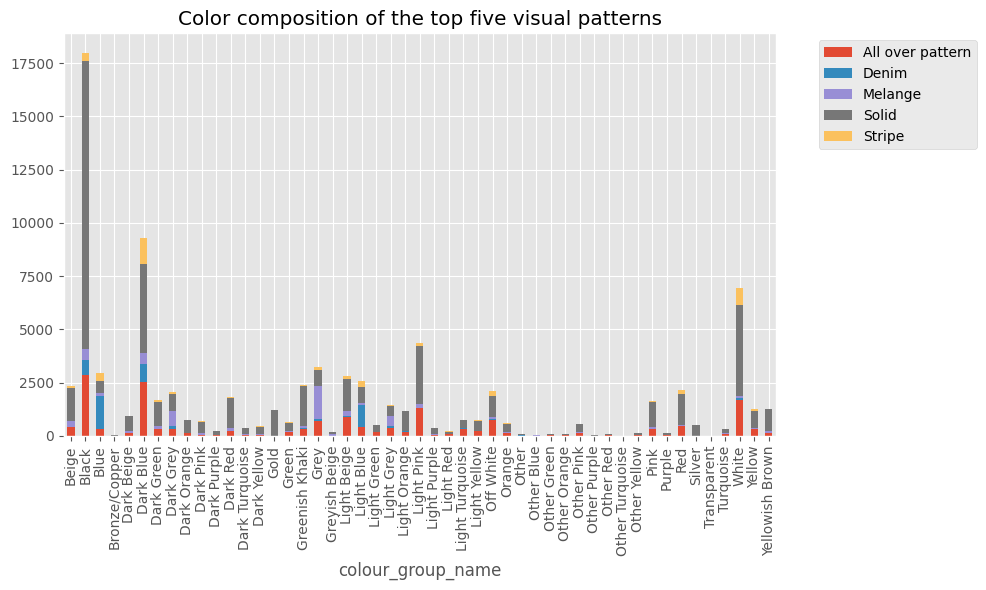

In [3]:
# ---------- 5. 層級／交叉分析 ----------
# (a) product_group_name × index_name
cross_pg_ix = (
    df.groupby(["product_group_name", "index_name"])
      .size()
      .reset_index(name="cnt")
      .pivot(index="product_group_name", columns="index_name", values="cnt")
      .fillna(0)
)
plt.figure(figsize=(10,6))
sns.heatmap(cross_pg_ix, cmap="Blues", linewidths=.5)
plt.title("Articles x Index Heatmap")
plt.tight_layout()
plt.show()
# plt.savefig("fig_pg_vs_index.png")
# plt.close()

# (b) graphical_appearance_name × colour_group_name（堆疊柱狀）
top_graph = df["graphical_appearance_name"].value_counts().head(5).index
tmp = df[df["graphical_appearance_name"].isin(top_graph)]
stack_df = (
    tmp.groupby(["graphical_appearance_name", "colour_group_name"])
       .size()
       .unstack(fill_value=0)
)
stack_df.T.plot(kind="bar", stacked=True, figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.title("Color composition of the top five visual patterns")
plt.tight_layout()
plt.show()
# plt.savefig("fig_graph_vs_color.png")
# plt.close()


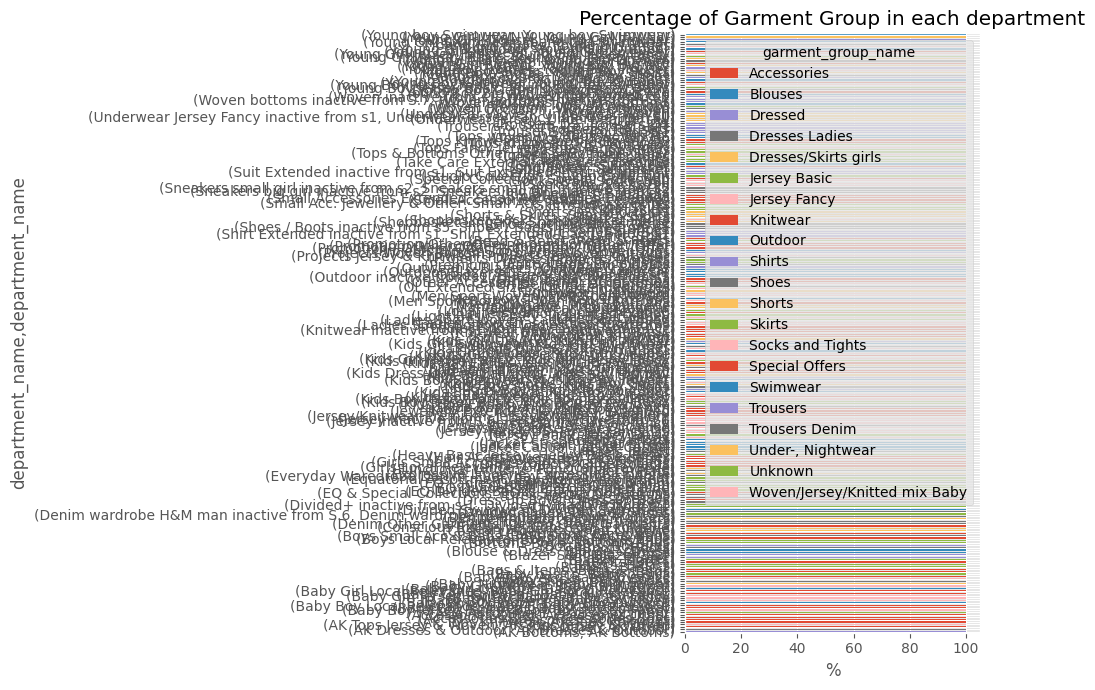

In [4]:
# STEP 5  ──────────────────────────────────────────────────────────────────────
#   部門 & 服飾群組百分比分布
dept_share = (
    df.groupby(["department_name", "garment_group_name"])
      .size()
      .groupby(level=0).apply(lambda x: 100*x/x.sum())
      .unstack(fill_value=0)
)
dept_share.plot(kind="barh", stacked=True, figsize=(10,7))
plt.title("Percentage of Garment Group in each department")
plt.xlabel("%")
plt.tight_layout()
plt.show()
# plt.savefig(OUT_DIR / "fig_dept_garment_share.png")
# plt.close()

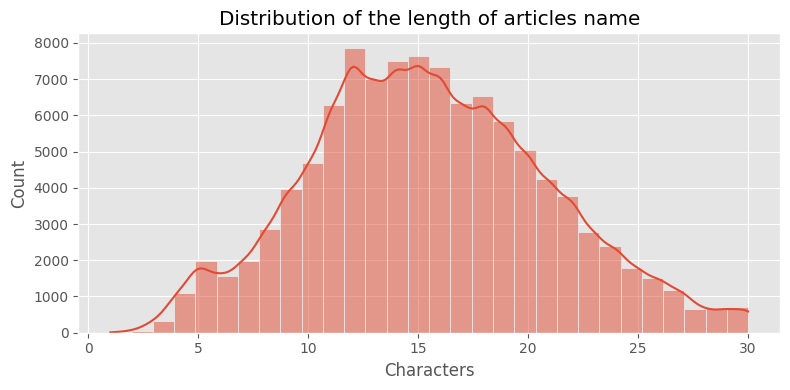

In [5]:
# STEP 6  ──────────────────────────────────────────────────────────────────────
#   產品名稱長度（字數）分布
df["name_len"] = df["prod_name"].str.len()
plt.figure(figsize=(8,4))
sns.histplot(df["name_len"], bins=30, kde=True)
plt.title("Distribution of the length of articles name")
plt.xlabel("Characters")
plt.tight_layout()
plt.show()
# plt.savefig(OUT_DIR / "fig_name_len.png")
# plt.close()

In [11]:
TRANS = path.join("..","data","transactions_train.csv")
print("📦 讀入 transactions_train.csv …")
tx = pd.read_csv(TRANS, parse_dates=["t_dat"])


#tx.iloc[0:1000].to_csv("trans_subset.csv")
if not path.exists(path.join("..","data","session.csv")):
    print("產生 session.csv")
    df_session = (
        tx
        .groupby("customer_id")
        .apply(lambda g: [
            (row.article_id, row.price, row.t_dat, row.sales_channel_id)
            for _, row in g.iterrows()
        ])
        .reset_index(name="session")
    )
    df_session.to_csv(path.join("..","data","session.csv"))
else:
    print("讀入 session.csv")
    df_session = pd.read_csv(path.join("..","data","session.csv"))
# 3. 看結果
display(df_session.head())
df_session.iloc[0:1000].to_csv(path.join("..","data","session_subset1000.csv"))



📦 讀入 transactions_train.csv …
讀入 session.csv


,Unnamed: 0,customer_id,session
0,0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,"[(625548001, 0.0440508474576271, Timestamp('20..."
1,1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,"[(583558001, 0.0677796610169491, Timestamp('20..."
2,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,"[(663713001, 0.0508305084745762, Timestamp('20..."
3,3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,"[(742079001, 0.0304915254237288, Timestamp('20..."
4,4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,"[(634249005, 0.0271016949152542, Timestamp('20..."


📦 讀入 transactions_train.csv …


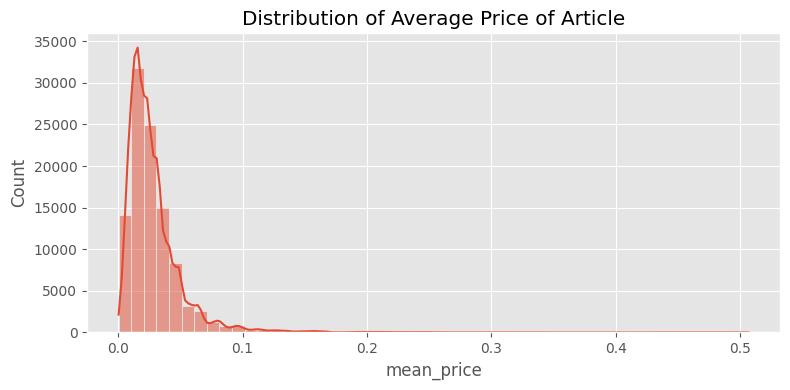

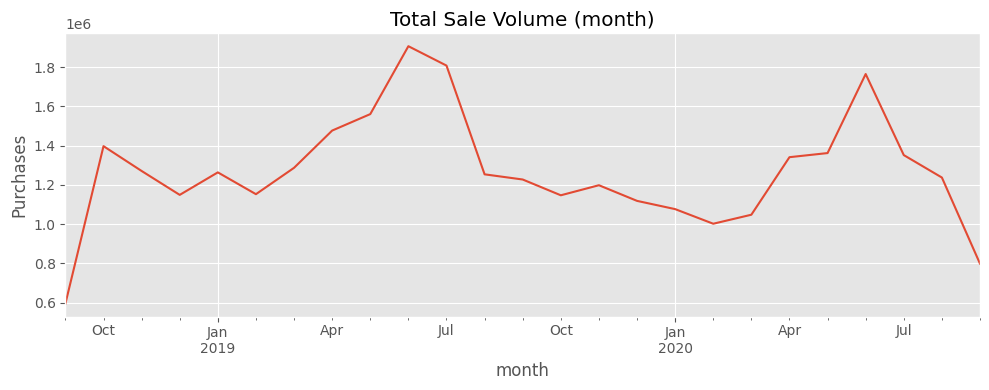

In [ ]:
# STEP 7  ──────────────────────────────────────────────────────────────────────
#   ⬇ 若要做「價格 & 時間」分析 (需 transactions_train.csv) 把下段解除註解

# 計算每件 article 的平均價格 & 銷量
tx_agg = (
    tx.groupby("article_id")
      .agg(mean_price=("price", "mean"), sales_cnt=("t_dat", "size"))
      .reset_index()
)
df_tx = df.merge(tx_agg, on="article_id", how="left")

# 價格分布
plt.figure(figsize=(8,4))
sns.histplot(df_tx["mean_price"].dropna(), bins=50, kde=True)
plt.title("Distribution of Average Price of Article")
plt.tight_layout()
plt.show()


# 銷售季節性 (月粒度)
tx["month"] = tx["t_dat"].dt.to_period("M")
month_cnt = tx.groupby("month").size()
month_cnt.plot(figsize=(10,4))
plt.title("Total Sale Volume (month)")
plt.ylabel("Purchases")
plt.tight_layout()
plt.show()



C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3640747154.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_top100["month"]   = tx_top100["t_dat"].dt.to_period("M")
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3640747154.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_least100["month"] = tx_least100["t_dat"].dt.to_period("M")


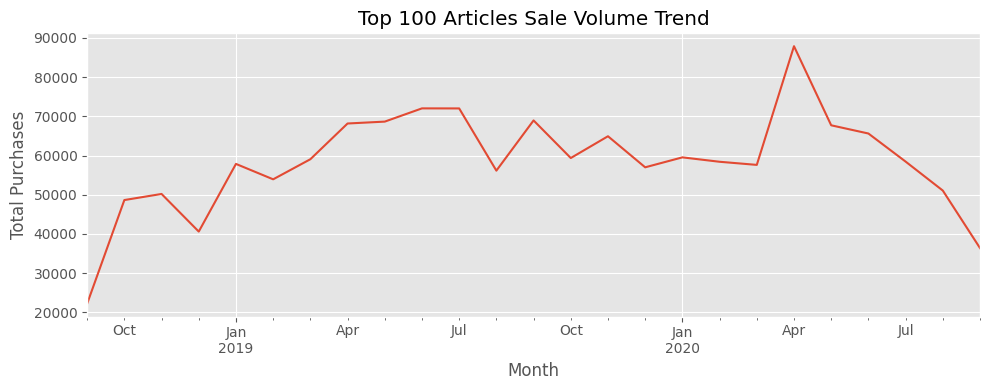

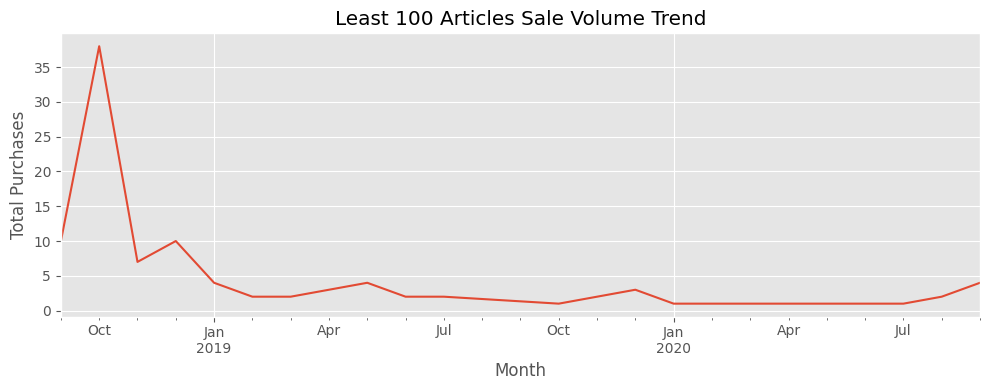

In [26]:


# 假設 tx 已經是包含所有交易資料的 DataFrame，且 tx["t_dat"] 已經是 datetime 格式

# 1. 計算每個 article 的總銷量（交易筆數）
tx_agg = (
    tx.groupby("article_id")
      .size()
      .reset_index(name="sales_cnt")
)

# 2. 取 Top 100 與 Least 100 的 article_id
top100_ids   = tx_agg.nlargest(100, "sales_cnt")["article_id"]
least100_ids = tx_agg.nsmallest(100, "sales_cnt")["article_id"]

# 3. 針對 Top 100/Least 100 分別過濾出交易資料
tx_top100   = tx[tx["article_id"].isin(top100_ids)]
tx_least100 = tx[tx["article_id"].isin(least100_ids)]

# 4. 加入「月」欄位，用於後續按月聚合
tx_top100["month"]   = tx_top100["t_dat"].dt.to_period("M")
tx_least100["month"] = tx_least100["t_dat"].dt.to_period("M")

# 5. 計算每個 article_id 在每個月的交易量
monthly_top100 = (
    tx_top100
    .groupby(["article_id", "month"])
    .size()
    .reset_index(name="monthly_cnt")
)

monthly_least100 = (
    tx_least100
    .groupby(["article_id", "month"])
    .size()
    .reset_index(name="monthly_cnt")
)

# 6. 將結果 pivot 成 「行：month、欄：article_id、值：monthly_cnt」，並以 0 補缺
pivot_top100 = (
    monthly_top100
    .pivot(index="month", columns="article_id", values="monthly_cnt")
    .fillna(0)
)

pivot_least100 = (
    monthly_least100
    .pivot(index="month", columns="article_id", values="monthly_cnt")
    .fillna(0)
)

# 7. 範例視覺化：畫出 Top 100 所有商品合計的「月度銷量走勢」
plt.figure(figsize=(10,4))
pivot_top100.sum(axis=1).plot()
plt.title("Top 100 Articles Sale Volume Trend")
plt.xlabel("Month")
plt.ylabel("Total Purchases")
plt.tight_layout()
plt.show()

# 同理也可以畫 Least 100
plt.figure(figsize=(10,4))
pivot_least100.sum(axis=1).plot()
plt.title("Least 100 Articles Sale Volume Trend")
plt.xlabel("Month")
plt.ylabel("Total Purchases")
plt.tight_layout()
plt.show()


C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


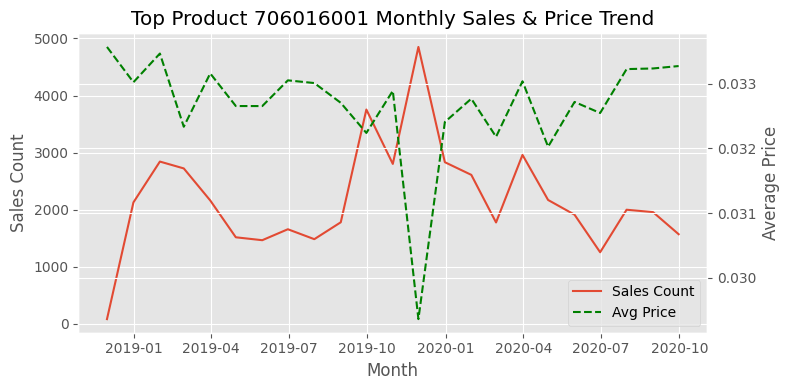

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


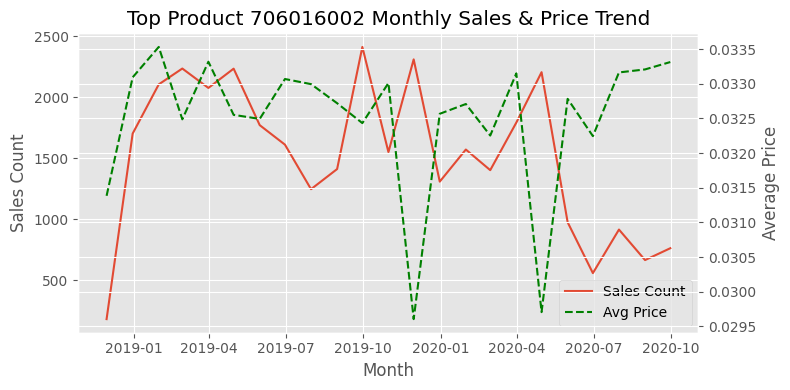

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


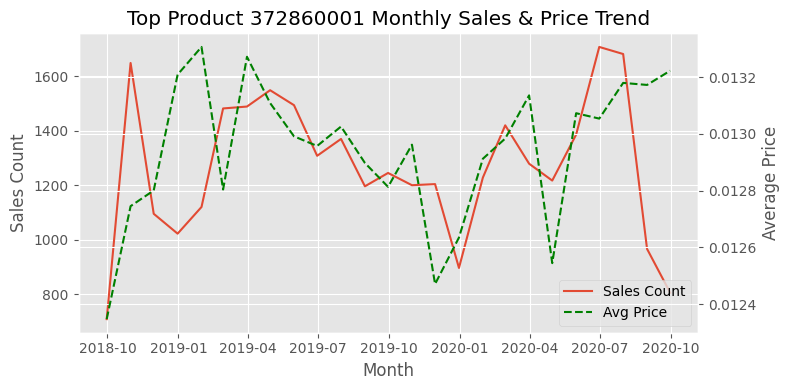

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


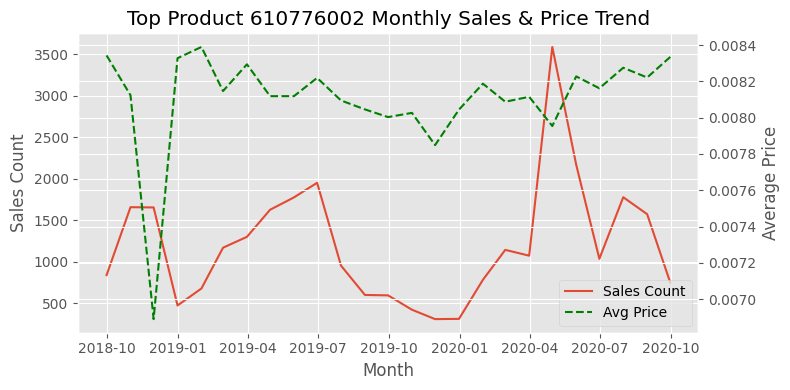

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


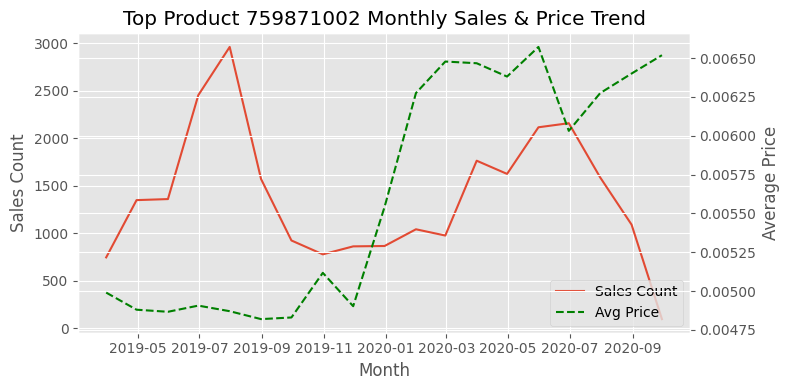

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


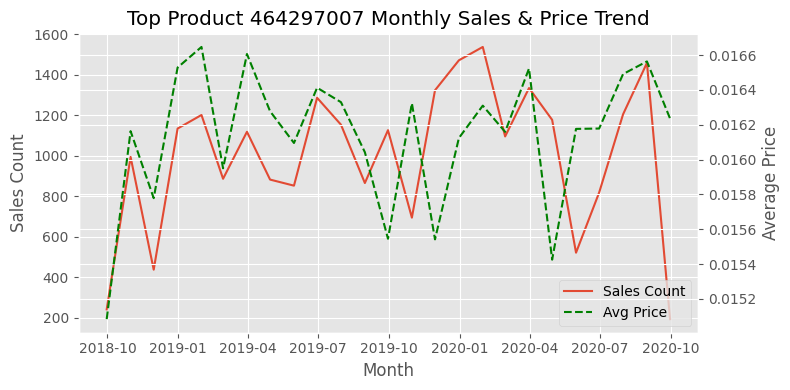

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


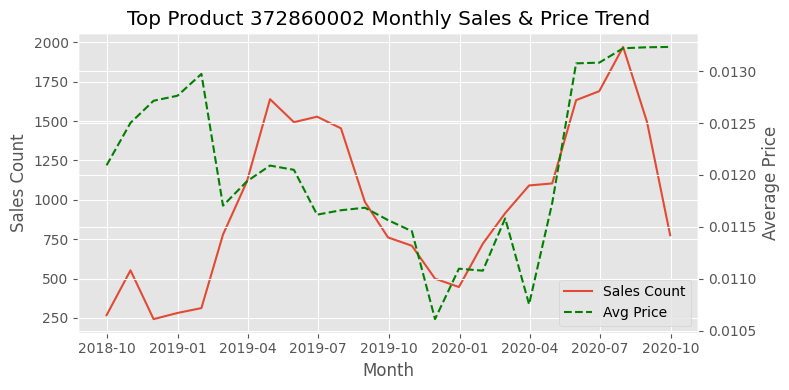

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


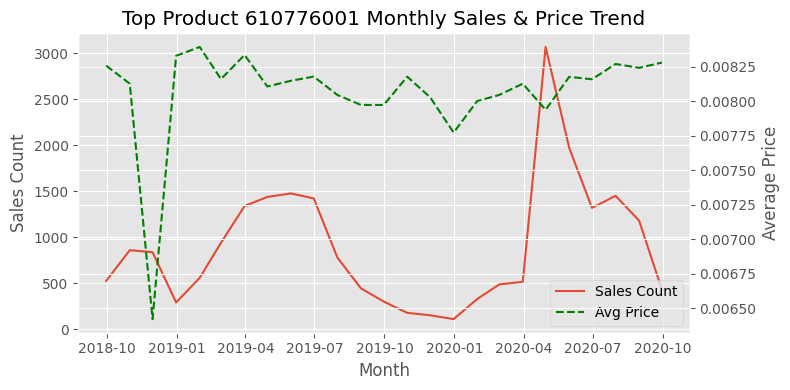

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


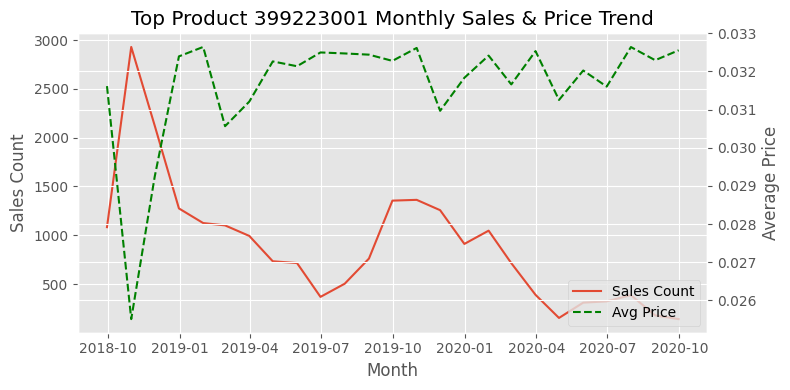

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


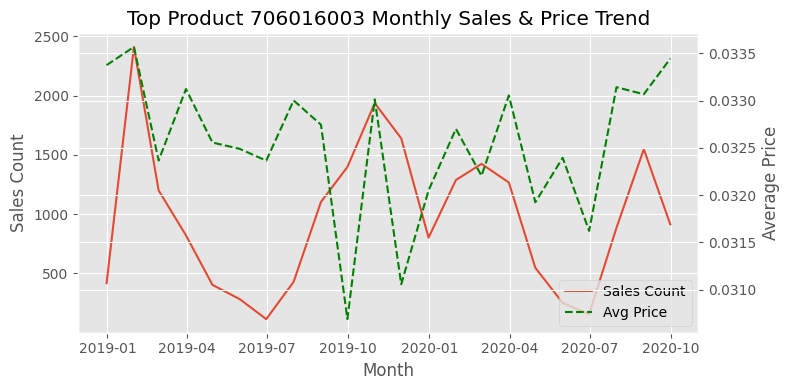

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


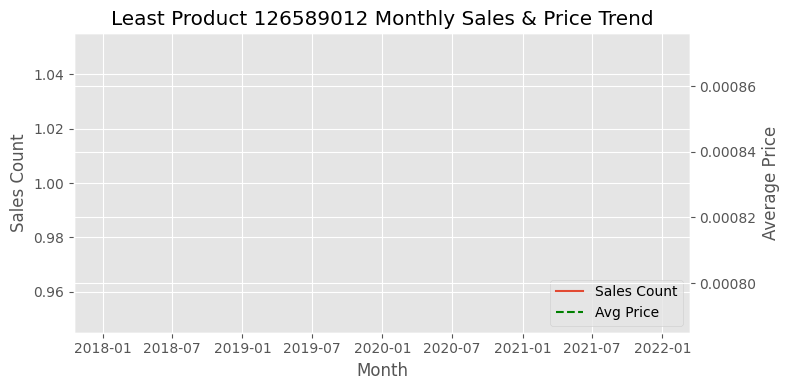

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


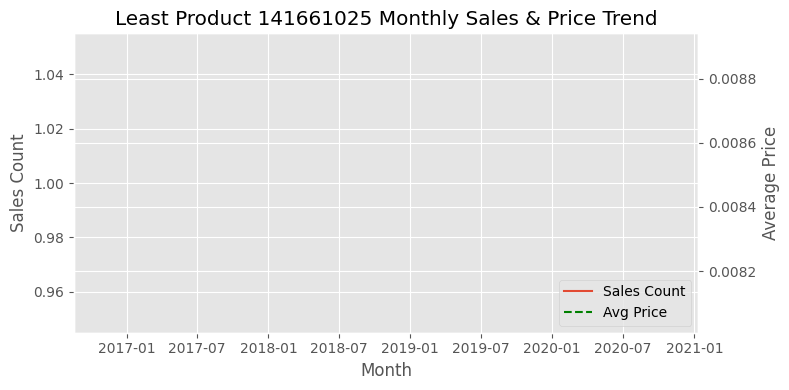

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


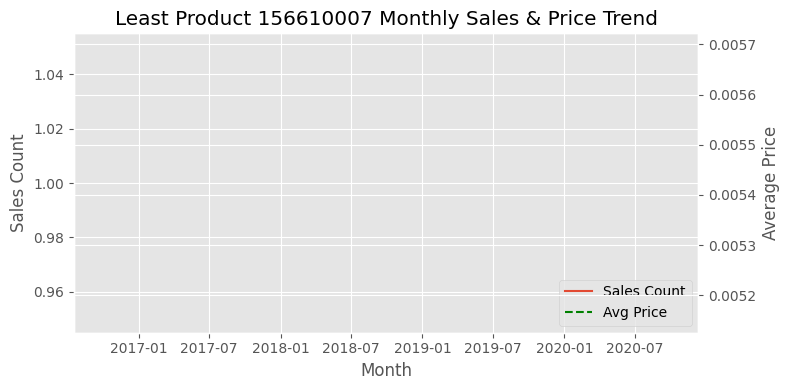

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


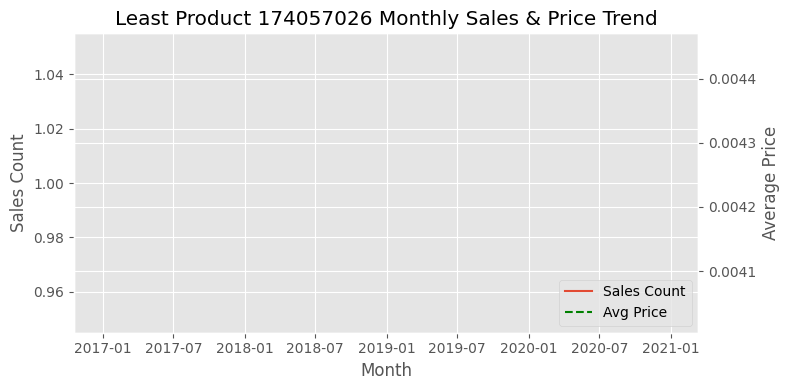

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


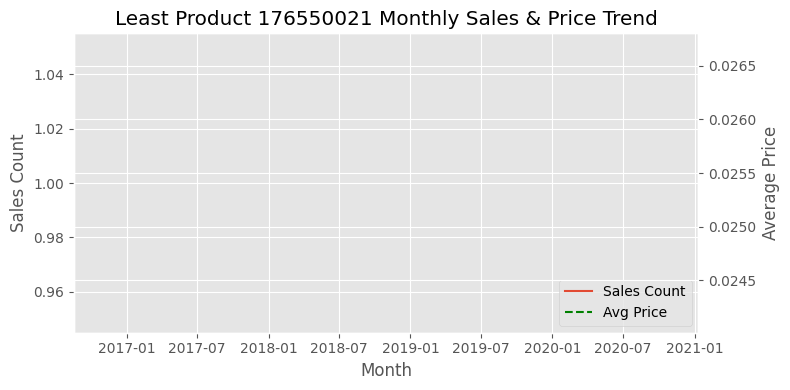

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


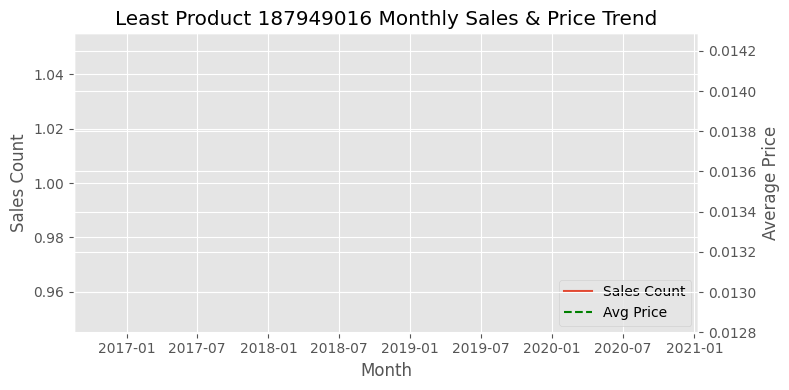

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


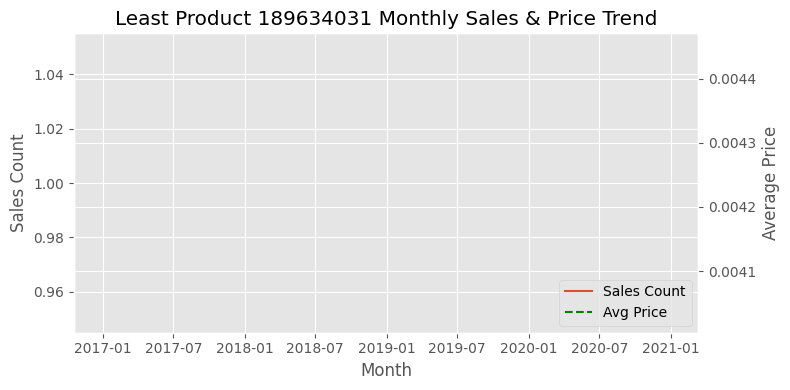

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


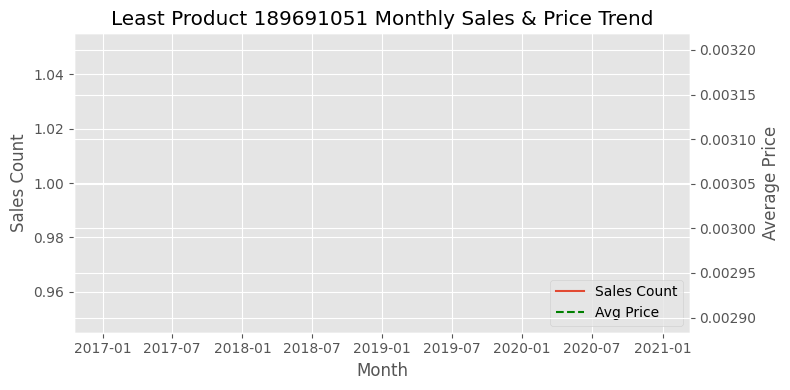

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


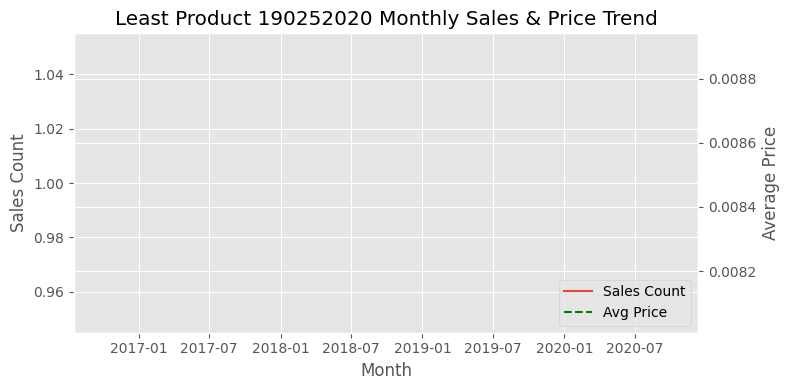

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


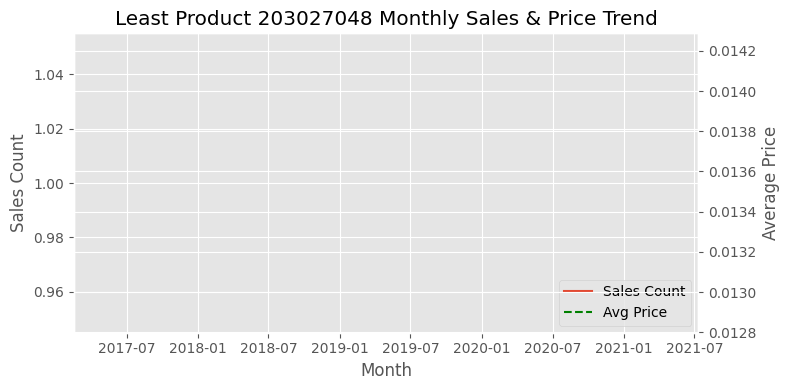

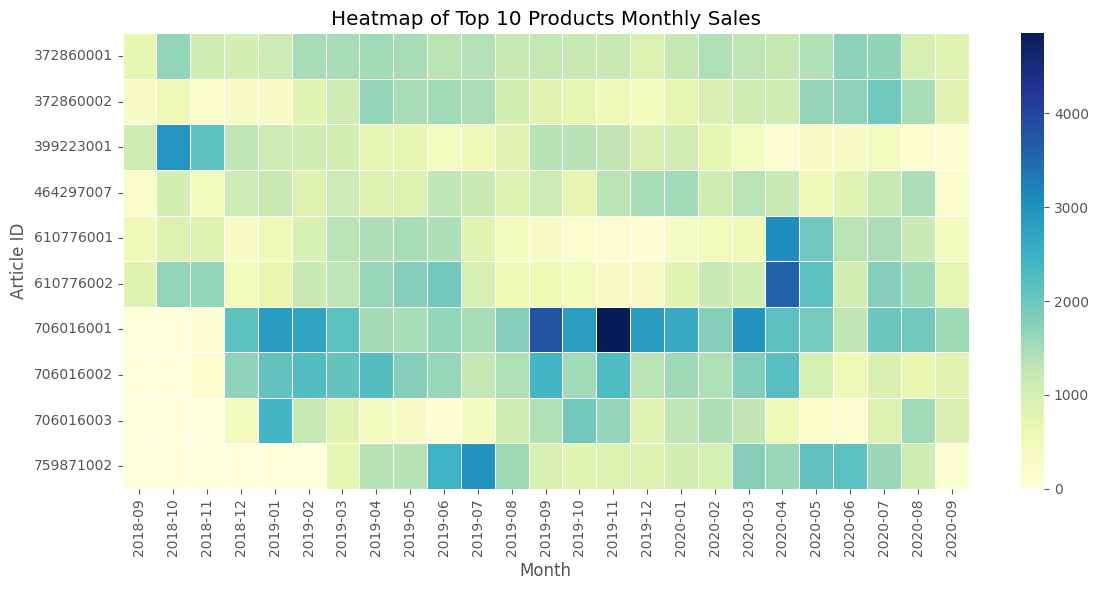

C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]
C:\Users\louislin\AppData\Local\Temp\ipykernel_86852\3779140126.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx[tx['article_id'] == aid]


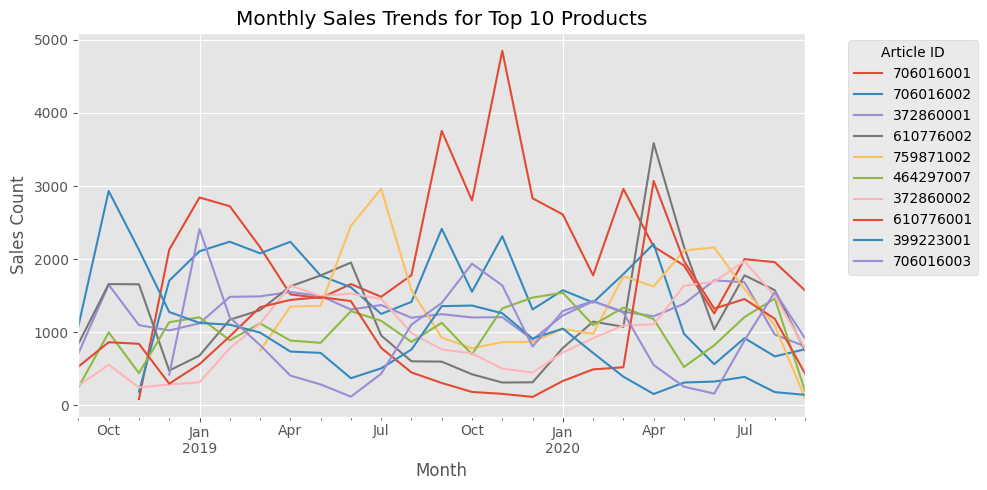

In [17]:
# 1. 定義取得 Top K 與 Least K 商品 ID 的函式
def get_top_least_ids(tx: pd.DataFrame, K: int = 10):
    sales_cnt = (
        tx.groupby('article_id')
          .size()
          .reset_index(name='sales_cnt')
    )
    top_ids = sales_cnt.nlargest(K, 'sales_cnt')['article_id'].tolist()
    least_ids = sales_cnt.nsmallest(K, 'sales_cnt')['article_id'].tolist()
    return top_ids, least_ids

# 2. 定義函式：根據商品 ID 列表，產生月×商品 的 pivot table
#    index: month, columns: article_id, values: monthly sales count
def prepare_monthly_pivot(tx: pd.DataFrame, ids: list):
    df_sub = tx[tx['article_id'].isin(ids)].copy()
    df_sub['month'] = df_sub['t_dat'].dt.to_period('M')
    monthly = (
        df_sub
        .groupby(['article_id', 'month'])
        .size()
        .reset_index(name='cnt')
    )
    pivot = monthly.pivot(index='month', columns='article_id', values='cnt').fillna(0)
    return pivot

K = 10  # 可自行調整 Top/Least 的數量
top_ids, least_ids = get_top_least_ids(tx, K)

# 3.1 單一商品月度銷量與價格走勢 (Top 10 & Least 10)
for ids, label in [(top_ids, 'Top'), (least_ids, 'Least')]:
    for aid in ids:
        # 計算月度銷量
        sales_series = (
            tx[tx['article_id'] == aid]
                .set_index('t_dat')
                .resample('M')
                .size()
        )
        # 計算月度平均價格
        price_series = (
            tx[tx['article_id'] == aid]
                .set_index('t_dat')
                .resample('M')
                ['price']
                .mean()
        )
        # 畫雙軸圖：左軸為銷量，右軸為價格
        fig, ax1 = plt.subplots(figsize=(8, 4))
        ax1.plot(sales_series.index, sales_series.values, label='Sales Count')
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Sales Count')
        ax1.set_title(f'{label} Product {aid} Monthly Sales & Price Trend')

        ax2 = ax1.twinx()
        ax2.plot(price_series.index, price_series.values, label='Avg Price', linestyle='--' ,color = 'green')
        ax2.set_ylabel('Average Price')

        # 合併圖例
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

        plt.tight_layout()
        plt.show()

# 3.2 Seaborn heatmap：月 × 商品 銷量熱度圖 (Top K)
pivot_top = prepare_monthly_pivot(tx, top_ids)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_top.T, cmap='YlGnBu', linewidths=0.5)
plt.title(f'Heatmap of Top {K} Products Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Article ID')
plt.tight_layout()
plt.show()

# 3.3 單獨畫出 K 個重點商品的月度折線圖 (多線合併)
plt.figure(figsize=(10, 5))
for aid in top_ids:
    series = (
        tx[tx['article_id'] == aid]
            .set_index('t_dat')
            .resample('M')
            .size()
    )
    series.name = str(aid)
    series.plot(label=str(aid))
plt.legend(title='Article ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'Monthly Sales Trends for Top {K} Products')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.tight_layout()
plt.show()


=== Session Statistics Overview ===
          avg_price  session_span_days     sales_cnt   session_len
count  1.362281e+06       1.362281e+06  1.362281e+06  1.362281e+06
mean   2.875476e-02       2.733907e+02  2.333463e+01  2.333463e+01
std    1.429338e-02       2.699620e+02  3.924225e+01  3.924225e+01
min    7.627119e-04       0.000000e+00  1.000000e+00  1.000000e+00
25%    2.095763e-02       0.000000e+00  3.000000e+00  3.000000e+00
50%    2.613317e-02       2.060000e+02  9.000000e+00  9.000000e+00
75%    3.336083e-02       5.490000e+02  2.700000e+01  2.700000e+01
max    5.067797e-01       7.330000e+02  1.895000e+03  1.895000e+03


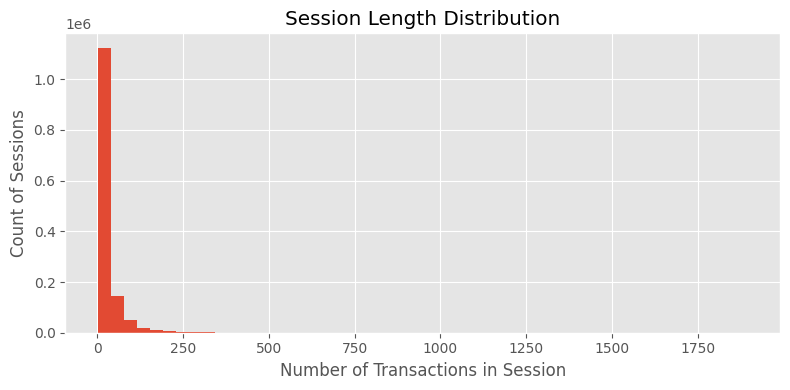

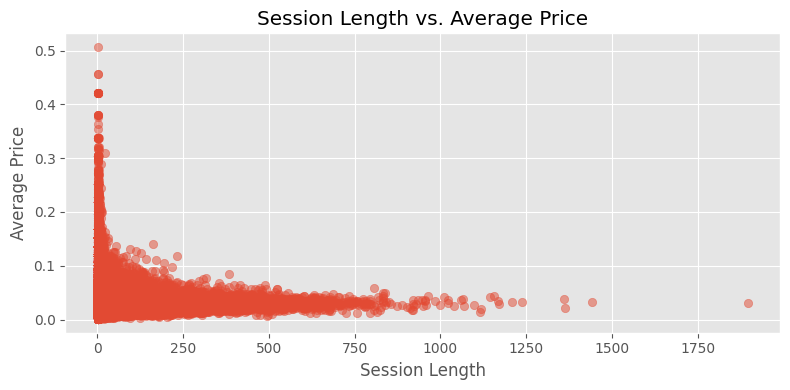

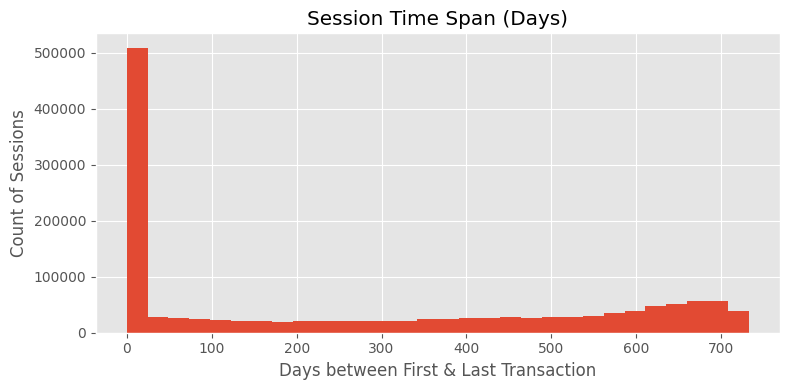

Sales Channel Distribution (Proportion):
sales_channel_id
2    0.704028
1    0.295972
Name: proportion, dtype: float64


In [25]:
import ast
import re
def load_sessions(path: str) -> pd.DataFrame:
    """
    Load session CSV and parse the 'session' column into lists of tuples.
    Handles cases where t_dat values were saved as Timestamp calls.
    """
    df = pd.read_csv(path)
    def parse_session(s: str):
        if pd.isna(s) or not isinstance(s, str):
            return []
        # Replace pandas Timestamp(...) with plain date string
        s_clean = re.sub(r"Timestamp\('([^']+)'\)", r"'\1'", s)
        # Evaluate literal list of tuples
        try:
            return ast.literal_eval(s_clean)
        except Exception as e:
            print(f"Failed to parse session string: {s[:100]}... => {e}")
            return []
    df['session'] = df['session'].apply(parse_session)
    return df


def compute_session_stats(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Computes session-level statistics and returns:
    - stats: summary DataFrame
    - exploded: each transaction row DataFrame
    """
    df['session_len'] = df['session'].apply(len)
    exploded = df.explode('session').dropna(subset=['session']).reset_index(drop=True)
    # Keep only valid tuples of length 4
    exploded = exploded[exploded['session'].apply(lambda x: isinstance(x, (tuple,list)) and len(x)==4)]
    # Expand fields
    details = pd.DataFrame(exploded['session'].tolist(),
                           columns=['article_id','price','t_dat','sales_channel_id'],
                           index=exploded.index)
    exploded = pd.concat([exploded.drop(columns=['session']), details], axis=1)
    exploded['t_dat'] = pd.to_datetime(exploded['t_dat'])

    stats = exploded.groupby('customer_id').agg(
        avg_price=('price','mean'),
        session_span_days=('t_dat', lambda x: (x.max()-x.min()).days),
        sales_cnt=('t_dat','size')
    ).reset_index()
    # Merge session length
    stats = stats.merge(df[['customer_id','session_len']], on='customer_id')
    return stats, exploded


def plot_session_length(df: pd.DataFrame):
    plt.figure(figsize=(8,4))
    df['session_len'].hist(bins=50)
    plt.title('Session Length Distribution')
    plt.xlabel('Number of Transactions in Session')
    plt.ylabel('Count of Sessions')
    plt.tight_layout()
    plt.show()


def plot_avg_price_vs_length(stats: pd.DataFrame):
    plt.figure(figsize=(8,4))
    plt.scatter(stats['session_len'], stats['avg_price'], alpha=0.5)
    plt.title('Session Length vs. Average Price')
    plt.xlabel('Session Length')
    plt.ylabel('Average Price')
    plt.tight_layout()
    plt.show()


def plot_time_span(stats: pd.DataFrame):
    plt.figure(figsize=(8,4))
    stats['session_span_days'].hist(bins=30)
    plt.title('Session Time Span (Days)')
    plt.xlabel('Days between First & Last Transaction')
    plt.ylabel('Count of Sessions')
    plt.tight_layout()
    plt.show()


def show_sales_channel_distribution(exploded: pd.DataFrame):
    counts = exploded['sales_channel_id'].value_counts(normalize=True)
    print("Sales Channel Distribution (Proportion):")
    print(counts)

try:
    df_sessions = load_sessions(path.join("..","data","session.csv"))
except Exception as e:
    print(f"Error loading sessions: {e}")
    raise

# Compute stats
stats, exploded = compute_session_stats(df_sessions)

# Display descriptive statistics
print("=== Session Statistics Overview ===")
print(stats.describe())

# Plot distributions and relationships
plot_session_length(df_sessions)
plot_avg_price_vs_length(stats)
plot_time_span(stats)
show_sales_channel_distribution(exploded)

